# 1- Loan Approval Prediction

Introduction
This project focuses on predicting whether a loan application will be approved using applicant demographics, financial attributes, and asset information from the **Kaggle Loan Approval dataset**. The dataset contains features such as the **number of dependents**, **education**, **employment** **status**, **annual income**, **loan amount** and various asset values, which together help determine the likelihood of loan approval.

Objectives:

- Understand the relationship between applicant demographics, financial profiles, and asset holdings on loan approval decisions.

- Build and compare **Logistic Regression** , **Decision Tree** and **Random Forest models** to predict loan approval (loan_status).

- Evaluate model performance using classification metrics, confusion matrices, precision , recall and f1 score.

- Apply data preprocessing, encoding, feature scaling, and hyperparameter tuning to improve model accuracy and robustness.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## 📂 2. Data Loading

In [ ]:
df = pd.read_csv('../data/loan_approval_dataset.csv')

### Display shape and first few rows.

In [3]:
df.shape

(4269, 13)

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Check column names and data types.

In [5]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### Identify Target Variable

In [9]:
df['loan_status'].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


## 🔍 3. Exploratory Data Analysis (EDA)

### Check Missing Values

In [10]:
df.isna().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


### Visualize Distributions

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
numerical_cols = df.select_dtypes(include=['int64']).columns.to_list()
print(f"categorical_cols is {categorical_cols}")
print(f"numerical_cols is {numerical_cols}")

categorical_cols is ['education', 'self_employed', 'loan_status']
numerical_cols is ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


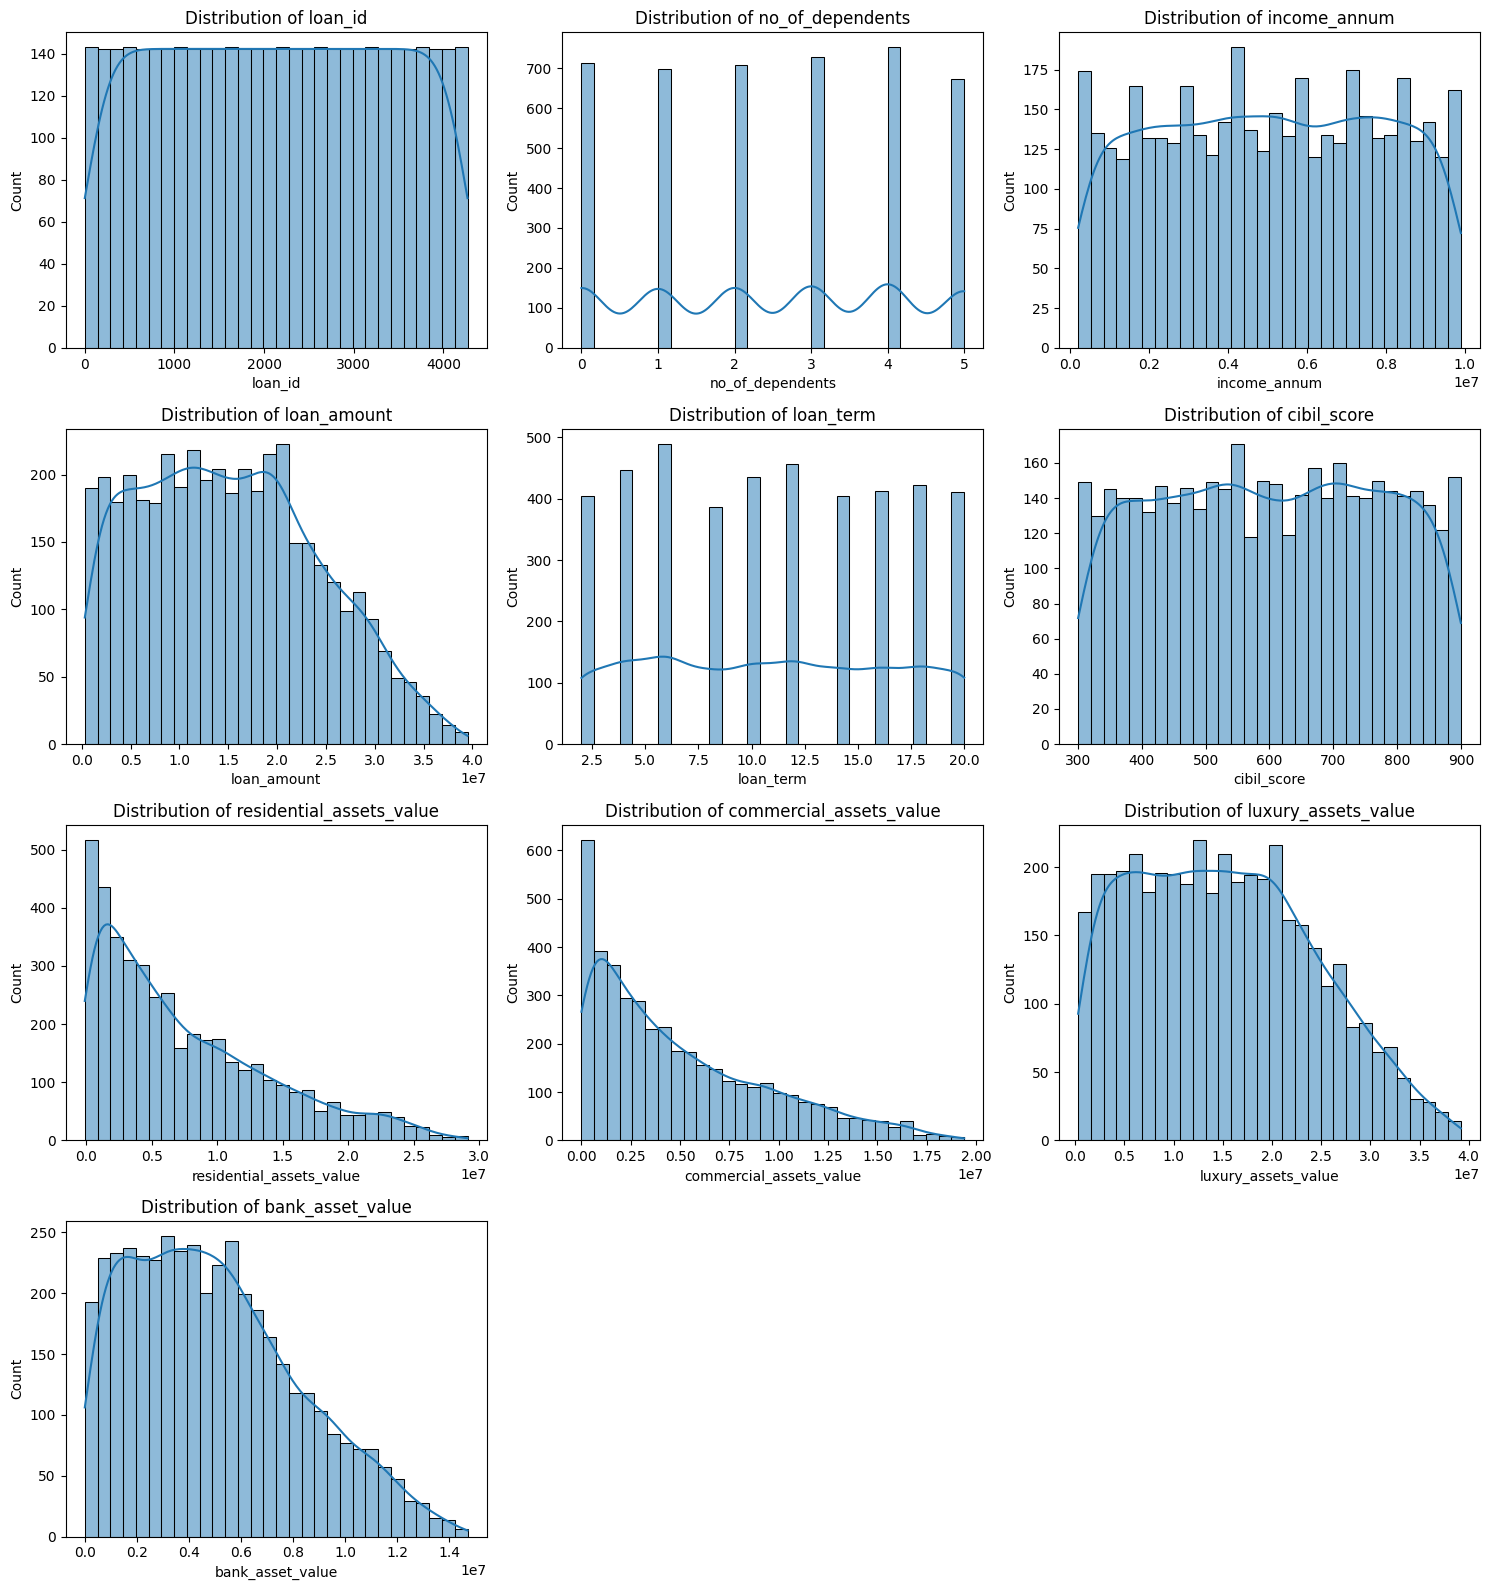

In [12]:
n_cols = 3
n_rows = math.ceil(len(numerical_cols)/n_cols)

fig,axes = plt.subplots(n_rows,n_cols,figsize=(5 * n_cols ,4 * n_rows))
axes = axes.flatten()

for i , col in enumerate(numerical_cols):
    sns.histplot(df[col],kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")


for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

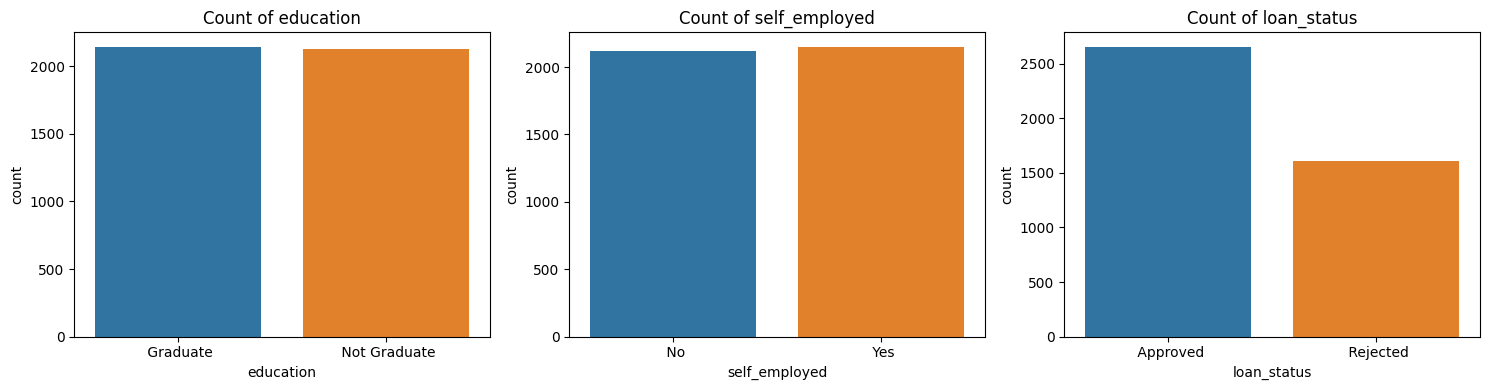

In [13]:
n_cols = 3
n_rows = math.ceil(len(categorical_cols)/n_cols)


fig , axes = plt.subplots(n_rows,n_cols,figsize=(n_cols * 5 , n_rows * 4))
axes = axes.flatten()

for i , col in enumerate(categorical_cols):
    sns.countplot(x= col,data=df,ax=axes[i],hue=col)
    axes[i].set_title(f"Count of {col}")


plt.tight_layout()
plt.show()

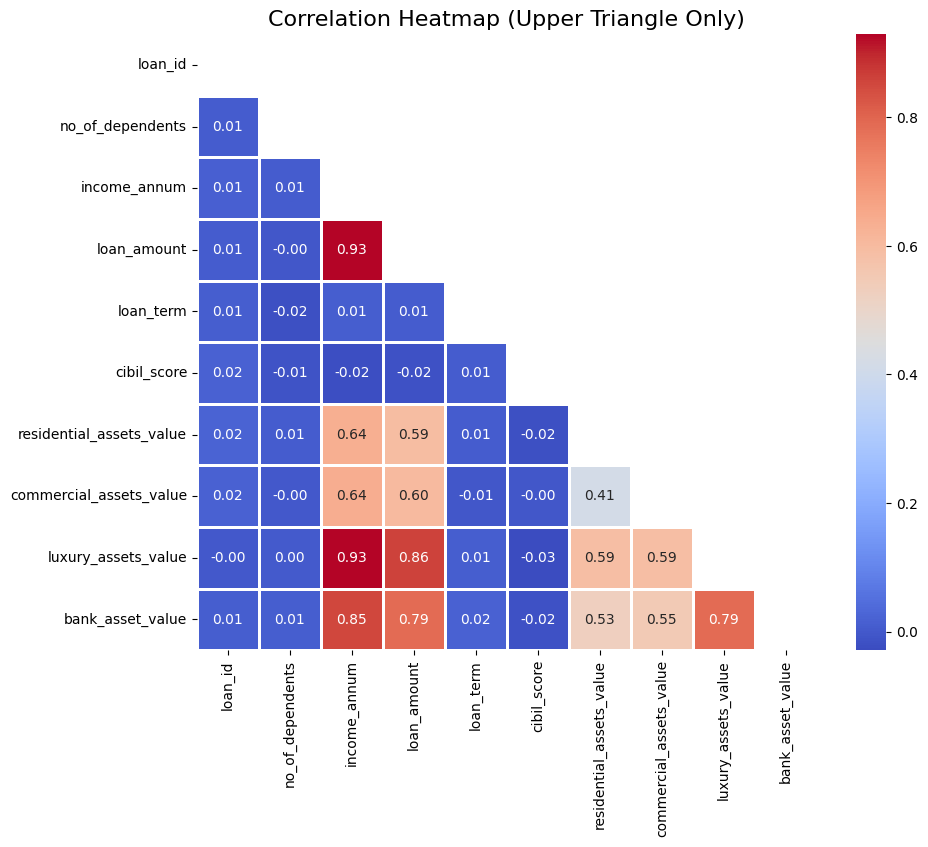

In [14]:
corr_matrix = df.corr(numeric_only=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    linewidths=1,     # you had 5, smaller value looks cleaner
    mask=mask,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap (Upper Triangle Only)", fontsize=16)
plt.show()

In [15]:
# Compute absolute correlation matrix
corr_matrix = df.corr(numeric_only=True).abs()

# Take upper triangle (ignore duplicates and diagonal)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set your threshold
threshold = 0.7

# Find column pairs above threshold
high_corr_pairs = [
    (col1, col2, upper.loc[col1, col2])
    for col1 in upper.columns
    for col2 in upper.index
    if upper.loc[col1, col2] > threshold]

# Display results
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} ↔ {col2}: {corr_value:.2f}")


income_annum ↔ loan_amount: 0.93
income_annum ↔ luxury_assets_value: 0.93
income_annum ↔ bank_asset_value: 0.85
loan_amount ↔ luxury_assets_value: 0.86
loan_amount ↔ bank_asset_value: 0.79
luxury_assets_value ↔ bank_asset_value: 0.79


In [16]:
from scipy.stats import chi2_contingency

for col in categorical_cols:
    if col == 'loan_status':
        continue
    contingency = pd.crosstab(df[col], df['loan_status'])
    chi2, p, dof, ex = chi2_contingency(contingency)
    print(f"{col}: p-value = {p:.4f}, {'Has Effect' if p < 0.05 else 'No Effect'}")


education: p-value = 0.7720, No Effect
self_employed: p-value = 1.0000, No Effect


In [17]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape)-1)))

for col in categorical_cols:
    if col == 'loan_status':
        continue
    v = cramers_v(df[col], df['loan_status'])
    print(f"{col}: Cramér's V = {v:.2f}")


education: Cramér's V = 0.00
self_employed: Cramér's V = 0.00


## 🧹 4. Preprocessing

### Dropping unnecessary features

In [18]:
df.drop(['luxury_assets_value','bank_asset_value','loan_id','education','self_employed'],axis=1,inplace=True)

In [19]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,loan_status
0,2,9600000,29900000,12,778,2400000,17600000,Approved
1,0,4100000,12200000,8,417,2700000,2200000,Rejected
2,3,9100000,29700000,20,506,7100000,4500000,Rejected
3,3,8200000,30700000,8,467,18200000,3300000,Rejected
4,5,9800000,24200000,20,382,12400000,8200000,Rejected


### transforming skewed features

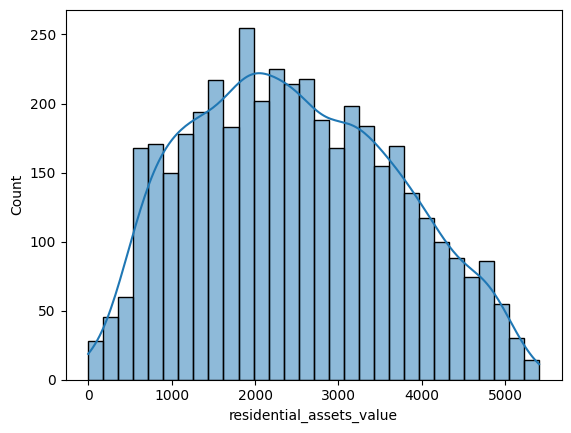

In [20]:
df['residential_assets_value'] = np.sqrt(df['residential_assets_value'] - df['residential_assets_value'].min() + 1)

sns.histplot(data=df,x='residential_assets_value',kde=True,bins=30)
plt.show()

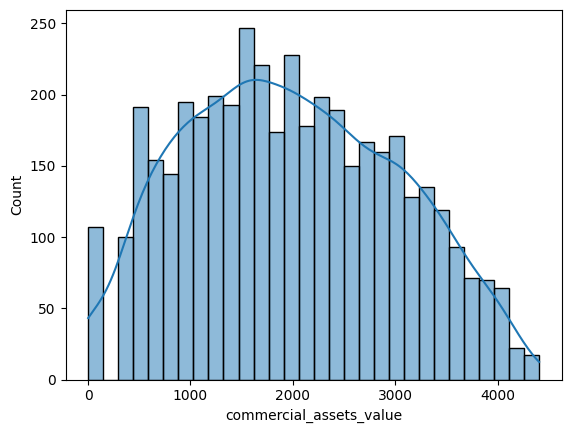

In [21]:
df['commercial_assets_value'] = np.sqrt(df['commercial_assets_value'] - df['commercial_assets_value'].min() + 1)

sns.histplot(data=df,x='commercial_assets_value',kde=True,bins=30)
plt.show()

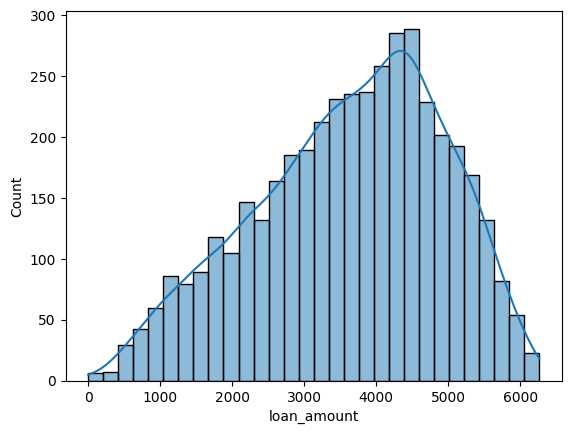

In [22]:
df['loan_amount'] = np.sqrt(df['loan_amount'] - df['loan_amount'].min() + 1)

sns.histplot(data=df,x='loan_amount',kde=True,bins=30)
plt.show()

In [23]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,loan_status
0,2,9600000,5440.588295,12,778,1581.139146,4195.235512,Approved
1,0,4100000,3449.637807,8,417,1673.320352,1483.240035,Rejected
2,3,9100000,5422.176777,20,506,2683.281759,2121.320579,Rejected
3,3,8200000,5513.619592,8,467,4277.850044,1816.590488,Rejected
4,5,9800000,4888.762727,20,382,3535.534047,2863.564387,Rejected


### Encoding Categorical Features

In [24]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['loan_status'] = le.fit_transform(df['loan_status']) # Approved => 0 , Rejected => 1
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,loan_status
0,2,9600000,5440.588295,12,778,1581.139146,4195.235512,0
1,0,4100000,3449.637807,8,417,1673.320352,1483.240035,1
2,3,9100000,5422.176777,20,506,2683.281759,2121.320579,1
3,3,8200000,5513.619592,8,467,4277.850044,1816.590488,1
4,5,9800000,4888.762727,20,382,3535.534047,2863.564387,1


### Scaling numerical features

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in df.columns.to_list():
    if col == 'loan_status':
        continue
    df[col] = scaler.fit_transform(df[[col]])

df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,loan_status
0,-0.294102,1.617979,1.388502,0.192617,1.032792,-0.729450,2.148142,0
1,-1.473548,-0.341750,-0.131463,-0.508091,-1.061051,-0.653666,-0.477486,1
2,0.295621,1.439822,1.374446,1.594031,-0.544840,0.176646,0.140274,1
3,0.295621,1.119139,1.444256,-0.508091,-0.771045,1.487577,-0.154752,1
4,1.475067,1.689242,0.967218,1.594031,-1.264055,0.877302,0.858880,1


### Splittin data into features and target

In [26]:
X = df.drop(columns='loan_status')
y = df['loan_status']

In [27]:
X.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value
0,-0.294102,1.617979,1.388502,0.192617,1.032792,-0.729450,2.148142
1,-1.473548,-0.341750,-0.131463,-0.508091,-1.061051,-0.653666,-0.477486
2,0.295621,1.439822,1.374446,1.594031,-0.544840,0.176646,0.140274
3,0.295621,1.119139,1.444256,-0.508091,-0.771045,1.487577,-0.154752
4,1.475067,1.689242,0.967218,1.594031,-1.264055,0.877302,0.858880


In [28]:
y.head()

,loan_status
0,0
1,1
2,1
3,1
4,1


### Splitting the data to trainning , validation and testing

In [29]:
from sklearn.model_selection import train_test_split

# 70% training, 15% validation, 15% testing
X_train, X_remaining, y_train, y_remaining = train_test_split(
    X, y, train_size=0.7, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_remaining, y_remaining, train_size=0.5, random_state=42, stratify=y_remaining
)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (2988, 7), Val: (640, 7), Test: (641, 7)


### ⚙️ 5. Model Selection & Training

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)


y_val_pred = logistic_model.predict(X_val)

print("classification report")
print(metrics.classification_report(y_val,y_val_pred,target_names=['Approved','Rejected']))

classification report
              precision    recall  f1-score   support

    Approved       0.94      0.95      0.95       398
    Rejected       0.92      0.90      0.91       242

    accuracy                           0.93       640
   macro avg       0.93      0.93      0.93       640
weighted avg       0.93      0.93      0.93       640



### Decision Tree

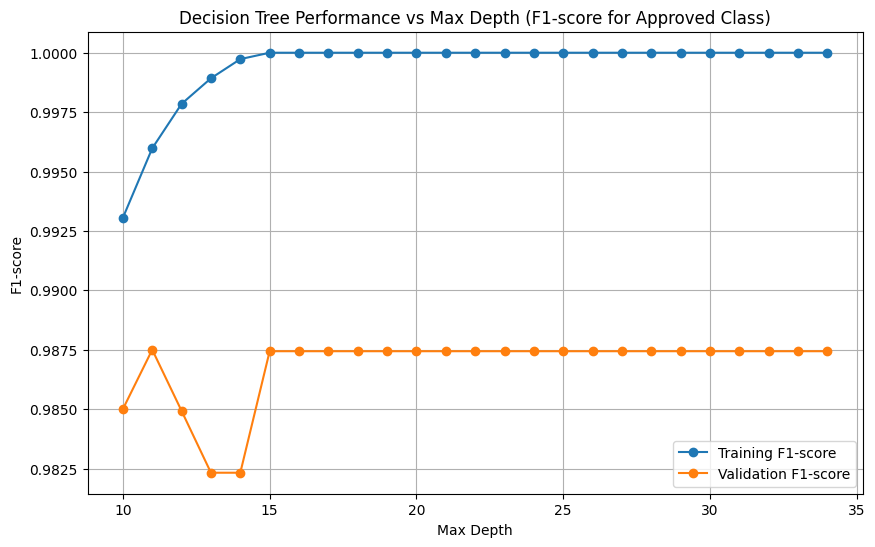

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

max_depth_values = range(10, 35) # hypertunning max_depth parameter
train_f1_scores = []
val_f1_scores = []

for depth in max_depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)

    # Predictions
    y_train_pred = tree.predict(X_train)
    y_val_pred = tree.predict(X_val)

    # F1-score for class 'Approved' (0)
    train_f1 = f1_score(y_train, y_train_pred, pos_label=0)
    val_f1 = f1_score(y_val, y_val_pred, pos_label=0)

    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)

# ========== Visualize ==========
plt.figure(figsize=(10,6))
plt.plot(max_depth_values, train_f1_scores, marker='o', label='Training F1-score')
plt.plot(max_depth_values, val_f1_scores, marker='o', label='Validation F1-score')

plt.title('Decision Tree Performance vs Max Depth (F1-score for Approved Class)')
plt.xlabel('Max Depth')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
decision_tree_model = DecisionTreeClassifier(max_depth=15,random_state=42)
decision_tree_model.fit(X_train,y_train)
y_val_pred = decision_tree_model.predict(X_val)
print("Classification report")
print(metrics.classification_report(y_val,y_val_pred,target_names=['Approved','Rejected']))

Classification report
              precision    recall  f1-score   support

    Approved       0.99      0.99      0.99       398
    Rejected       0.98      0.98      0.98       242

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640



### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier


# Define parameter values to try
n_estimators_list = [10,50,100,200,500,1000]
max_depth_list = [2, 4, 8, 16, 32, 64]
min_samples_split_list = [2, 5, 10, 15, 20, 30, 50]

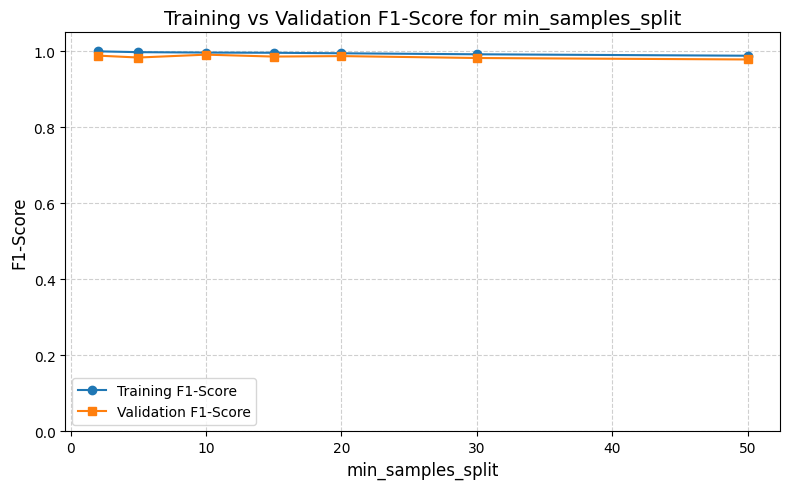

In [51]:
# Your existing data and list of values

train_f1_scores = []
val_f1_scores = []

for min_split in min_samples_split_list:

    # Train the model with the given min_samples_split
    model = RandomForestClassifier(
        min_samples_split=min_split,
        random_state=42
    )

    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # F1-score for class 'Approved' (0)
    train_f1 = f1_score(y_train, y_train_pred, pos_label=0)
    val_f1 = f1_score(y_val, y_val_pred, pos_label=0)

    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)

# --- Visualization ---
plt.figure(figsize=(8,5))
plt.plot(min_samples_split_list, train_f1_scores, marker='o', label='Training F1-Score')
plt.plot(min_samples_split_list, val_f1_scores, marker='s', label='Validation F1-Score')

plt.title('Training vs Validation F1-Score for min_samples_split', fontsize=14)
plt.xlabel('min_samples_split', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

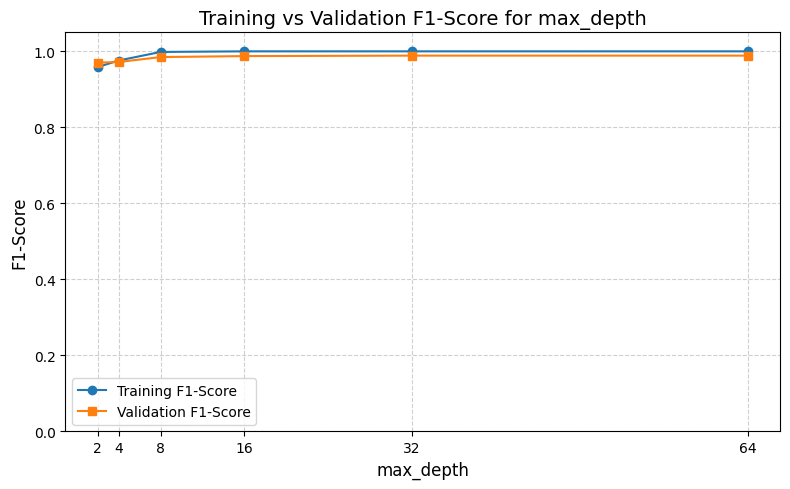

In [52]:
# --- Random Forest: Accuracy vs max_depth ---
train_f1_scores = []
val_f1_scores = []

for depth in max_depth_list:

    # Train model with specific max_depth
    model = RandomForestClassifier(
        max_depth=depth,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # F1-score for class 'Approved' (0)
    train_f1 = f1_score(y_train, y_train_pred, pos_label=0)
    val_f1 = f1_score(y_val, y_val_pred, pos_label=0)

    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)

# --- Visualization ---
plt.figure(figsize=(8,5))
plt.plot(max_depth_list, train_f1_scores, marker='o', label='Training F1-Score')
plt.plot(max_depth_list, val_f1_scores, marker='s', label='Validation F1-Score')

plt.title('Training vs Validation F1-Score for max_depth', fontsize=14)
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 1.05)  # ensure y-axis shows full range
plt.xticks(max_depth_list)  # make sure all depths appear as x-ticks
plt.tight_layout()
plt.show()


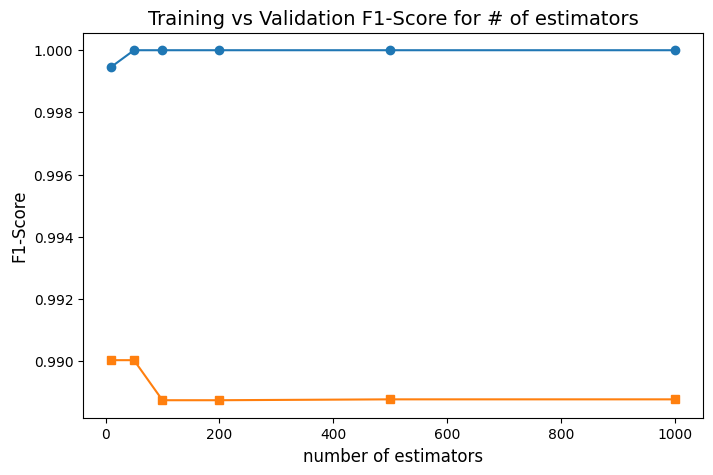

In [55]:
train_f1_scores = []
val_f1_scores = []

# Loop through each n_estimators value
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # F1-score for class 'Approved' (0)
    train_f1 = f1_score(y_train, y_train_pred, pos_label=0)
    val_f1 = f1_score(y_val, y_val_pred, pos_label=0)

    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)

# --- Visualization ---
plt.figure(figsize=(8,5))
plt.plot(n_estimators_list, train_f1_scores, marker='o', label='Training F1-Score')
plt.plot(n_estimators_list, val_f1_scores, marker='s', label='Validation F1-Score')
plt.title('Training vs Validation F1-Score for # of estimators', fontsize=14)
plt.xlabel('number of estimators', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.show()

In [56]:
rf_model = RandomForestClassifier(min_samples_split=10,max_depth=8,n_estimators=10)
rf_model.fit(X_train,y_train)
y_val_pred = rf_model.predict(X_val)
print("Classification report")
print(metrics.classification_report(y_val,y_val_pred,target_names=['Approved','Rejected']))

Classification report
              precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       398
    Rejected       0.98      0.97      0.97       242

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640



### final model

In [57]:
decision_tree_model = DecisionTreeClassifier(max_depth=15,random_state=42)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

### validation

In [61]:
y_val_pred = decision_tree_model.predict(X_val)
print("Classification report of validation")
print(metrics.classification_report(y_val,y_val_pred,target_names=['Approved','Rejected']))

Classification report of validation
              precision    recall  f1-score   support

    Approved       0.99      0.99      0.99       398
    Rejected       0.98      0.98      0.98       242

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640



### Test

In [60]:
y_test_pred = decision_tree_model.predict(X_test)
print("Classification report of Testing")
print(metrics.classification_report(y_test ,y_test_pred,target_names=['Approved','Rejected']))

Classification report of Testing
              precision    recall  f1-score   support

    Approved       0.97      0.99      0.98       399
    Rejected       0.99      0.95      0.97       242

    accuracy                           0.98       641
   macro avg       0.98      0.97      0.98       641
weighted avg       0.98      0.98      0.98       641



### saving the model

In [64]:
import joblib

# Save model
joblib.dump(decision_tree_model, "decision_tree_model.pkl")

['decision_tree_model.pkl']